In [5]:
import pickle  
import networkx as nx
import numpy as np
import random
import copy
import pandas as pd
import itertools
import math
from collections import Counter
from Motif_structures import * #orbit degree structure
from scipy import integrate
import matplotlib.pyplot as plt
import os
import shap
import ast
from matplotlib.ticker import FuncFormatter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #
from sklearn.preprocessing import StandardScaler

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

In [29]:
shap_values =  pd.read_csv('./results/shap_values1_domain.csv',index_col = 0)
network_132_social = list(shap_values['n_132'])
print(network_132_social)
data = network_132_social
network_132_social = [eval(item) for item in network_132_social if item.startswith("(")]
print(network_132_social)

["('M2', 2.9674232)", "('M4', 1.2248976)", "('N11', 0.70500433)", "('M5', 0.6819099)", "('M9', 0.42112416)", "('N7', 0.42088687)", "('M8', 0.40792066)", "('N1', 0.36464408)", "('M6', 0.32817465)", "('N3', 0.24139093)", "('N5', 0.17682499)", "('N4', 0.17325543)", "('N2', 0.11033999)", "('N10', 0.110022)", "('N12', 0.06402002)", "('N6', 0.0)", "('N8', 0.0)", "('N9', 0.0)", "('N13', 0.0)", "('N14', 0.0)", "('N15', 0.0)", "('M1', 0.0)", "('M3', 0.0)", "('M7', 0.0)", "('M10', 0.0)", "('M11', 0.0)", "('M12', 0.0)", 'Social/Affiliation']
[('M2', 2.9674232), ('M4', 1.2248976), ('N11', 0.70500433), ('M5', 0.6819099), ('M9', 0.42112416), ('N7', 0.42088687), ('M8', 0.40792066), ('N1', 0.36464408), ('M6', 0.32817465), ('N3', 0.24139093), ('N5', 0.17682499), ('N4', 0.17325543), ('N2', 0.11033999), ('N10', 0.110022), ('N12', 0.06402002), ('N6', 0.0), ('N8', 0.0), ('N9', 0.0), ('N13', 0.0), ('N14', 0.0), ('N15', 0.0), ('M1', 0.0), ('M3', 0.0), ('M7', 0.0), ('M10', 0.0), ('M11', 0.0), ('M12', 0.0)]


In [30]:
popularity_1_order = ['N1','N3','N6']
popularity_2_order = ['N2','N4','N5','N8','N10','N11']
popularity_3_order = ['N7','N9','N12','N13','N14','N15']
similarity_1_order = ['M1','M2','M3','M4','M8','M10']
similarity_2_order = ['M5','M6','M7','M9','M11','M12']

popularity_1_order_scores = 0
popularity_2_order_scores = 0
popularity_3_order_scores = 0
similarity_1_order_scores = 0
similarity_2_order_scores = 0

for i in network_132_social:
    if i[0] in popularity_1_order:
        popularity_1_order_scores+=i[1]
    elif i[0] in popularity_2_order:
        popularity_2_order_scores+=i[1]
    elif i[0] in popularity_3_order:
        popularity_3_order_scores+=i[1]
    elif i[0] in similarity_1_order:
        similarity_1_order_scores+=i[1]
    elif i[0] in similarity_2_order:
        similarity_2_order_scores+=i[1]

In [31]:
def calculate_scores(network_132_social):
    # 定义类别
    popularity_1_order = ['N1','N3','N6']
    popularity_2_order = ['N2','N4','N5','N8','N10','N11']
    popularity_3_order = ['N7','N9','N12','N13','N14','N15']
    similarity_1_order = ['M1','M2','M3','M4','M8','M10']
    similarity_2_order = ['M5','M6','M7','M9','M11','M12']

    # 初始化分数
    popularity_1_order_scores = 0
    popularity_2_order_scores = 0
    popularity_3_order_scores = 0
    similarity_1_order_scores = 0
    similarity_2_order_scores = 0

    # 计算得分
    for i in network_132_social:
        if i[0] in popularity_1_order:
            popularity_1_order_scores += i[1]
        elif i[0] in popularity_2_order:
            popularity_2_order_scores += i[1]
        elif i[0] in popularity_3_order:
            popularity_3_order_scores += i[1]
        elif i[0] in similarity_1_order:
            similarity_1_order_scores += i[1]
        elif i[0] in similarity_2_order:
            similarity_2_order_scores += i[1]

    # 总分
    all_score = sum(x[1] for x in network_132_social)

    # 计算占比
    result = {
        'popularity_1_order_rate': popularity_1_order_scores / all_score if all_score != 0 else 0,
        'popularity_2_order_rate': popularity_2_order_scores / all_score if all_score != 0 else 0,
        'popularity_3_order_rate': popularity_3_order_scores / all_score if all_score != 0 else 0,
        'similarity_1_order_rate': similarity_1_order_scores / all_score if all_score != 0 else 0,
        'similarity_2_order_rate': similarity_2_order_scores / all_score if all_score != 0 else 0
    }


    return result

# 调用函数
network_132_social = [('M2', 2.9674232), ('M4', 1.2248976), ('N11', 0.70500433), ('M5', 0.6819099), 
                      ('M9', 0.42112416), ('N7', 0.42088687), ('M8', 0.40792066), ('N1', 0.36464408), 
                      ('M6', 0.32817465), ('N3', 0.24139093), ('N5', 0.17682499), ('N4', 0.17325543), 
                      ('N2', 0.11033999), ('N10', 0.110022), ('N12', 0.06402002), ('N6', 0.0), ('N8', 0.0), 
                      ('N9', 0.0), ('N13', 0.0), ('N14', 0.0), ('N15', 0.0), ('M1', 0.0), ('M3', 0.0), 
                      ('M7', 0.0), ('M10', 0.0), ('M11', 0.0), ('M12', 0.0)]

score_ratios = calculate_scores(network_132_social)

print(type(score_ratios))
sorted_list = sorted(score_ratios.items(), key=lambda x: x[1], reverse=True) #按照降序排列，
print(sorted_list)
# 输出结果
for category, ratio in score_ratios.items():
    print(f"{category}: {ratio:.4f}")


<class 'dict'>
[('similarity_1_order_rate', 0.5477887304197973), ('similarity_2_order_rate', 0.17042583721608726), ('popularity_2_order_rate', 0.15187797347112927), ('popularity_1_order_rate', 0.07216559208999632), ('popularity_3_order_rate', 0.057741866802990004)]
popularity_1_order_rate: 0.0722
popularity_2_order_rate: 0.1519
popularity_3_order_rate: 0.0577
similarity_1_order_rate: 0.5478
similarity_2_order_rate: 0.1704


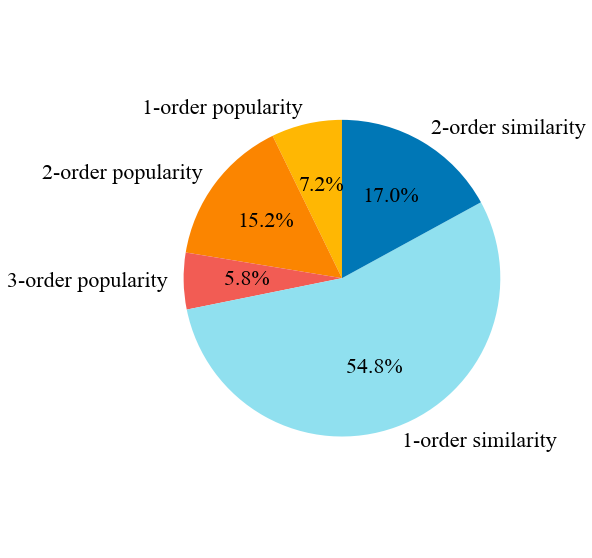

In [32]:
import matplotlib.pyplot as plt

# 数据
data = [
    ('popularity_1_order_rate', 0.07216559208999632),
    ('popularity_2_order_rate', 0.15187797347112927), 
    ('popularity_3_order_rate', 0.057741866802990004),
    ('similarity_1_order_rate', 0.5477887304197973),
    ('similarity_2_order_rate', 0.17042583721608726)  
]

label_map = {
    'popularity_1_order_rate': '1-order popularity',
    'popularity_2_order_rate': '2-order popularity',
    'popularity_3_order_rate': '3-order popularity',
    'similarity_1_order_rate': '1-order similarity',
    'similarity_2_order_rate': '2-order similarity'
}

# 提取标签和数值
labels, values = zip(*data)

color_map = {
    'popularity_1_order_rate': '#ffb703',  # 橙色
    'popularity_2_order_rate': '#fb8500',  
    'popularity_3_order_rate': '#f25c54',  
    'similarity_1_order_rate': '#90e0ef',  
    'similarity_2_order_rate': '#0077b6'  
}

colors = [color_map[label] for label in labels]

# 绘制饼图
fig, ax = plt.subplots(figsize=(8, 8))

# 绘制饼图
ax.pie(values, labels=[label_map[label] for label in labels],
       colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 22})

# 设置为等比图形
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# 保存图像
plt.tight_layout()
plt.savefig('./figures/category_analyses_net_132.pdf', dpi=700, bbox_inches='tight')
plt.show()


In [33]:
shap_values =  pd.read_csv('./results/shap_values_domain.csv',index_col = 0)
network_names = [f'net_{x}' for x in range(550)]
df = pd.DataFrame()
for i in network_names:
    network_132_social = list(shap_values[i])
    network_domain = network_132_social[-1]
    network_132_social = [eval(item) for item in network_132_social if item.startswith("(")]
    score_ratios = calculate_scores(network_132_social)
    sorted_list = sorted(score_ratios.items(), key=lambda x: x[1], reverse=True) 
    sorted_list.append(network_domain)
    df[i] = sorted_list

df.index = ['Top1', 'Top2', 'Top4', 'Top4', 'Top5', 'domain']
df.to_csv('./results/shap_values_multi_order.csv', index=True)
    

In [19]:
shap_values =  pd.read_csv('./results/shap_values_multi_order.csv',index_col = 0)

In [25]:
domains = ['Biological', 'Social','Transportation','Technological','Economic','Informational']
all_data_dict = []
complete_feature_list = ['popularity_1_order_rate','popularity_2_order_rate','popularity_3_order_rate',
                         'similarity_1_order_rate','similarity_2_order_rate']
for domain in domains:
    domain_shap = shap_values.loc[:, shap_values.loc['domain'].str.contains(domain)]
    top1 = domain_shap.loc['Top1']
    top1_features = [] #只存放特征，不存放具体值
    for i in top1:
        tuple_value = ast.literal_eval(i)
        top1_features.append(tuple_value[0])
    count = Counter(top1_features)
    total_count = sum(count.values())
    for feature in complete_feature_list:
        if feature not in count:
            count[feature] = 0
    tuple_list = [(key,round(count / total_count, 4)) for key, count in count.items()]
#     tuple_list = sorted(tuple_list, key=lambda x: x[1], reverse=True)
    dict_data = dict(tuple_list)
    all_data_dict.append(dict_data)

FixedFormatter should only be used together with FixedLocator


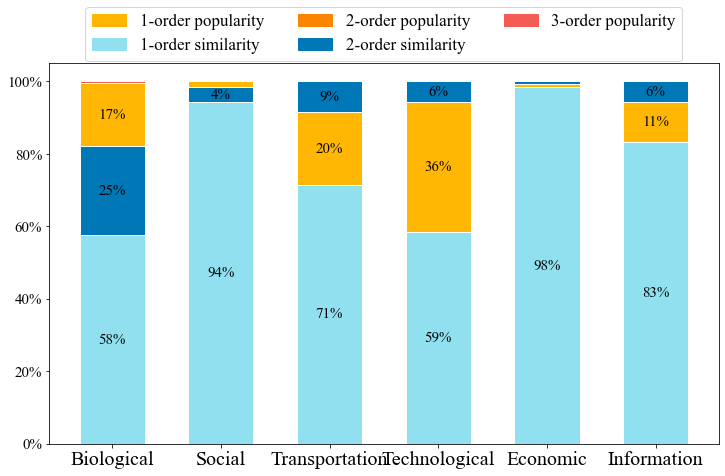

In [24]:
color_map = {
    'popularity_1_order_rate': '#ffb703',  # Orange
    'popularity_2_order_rate': '#fb8500',  
    'popularity_3_order_rate': '#f25c54',  
    'similarity_1_order_rate': '#90e0ef',  
    'similarity_2_order_rate': '#0077b6'  
}

def plot_stacked_bar(ax, data, position, label, color_map):
    # Sort categories dynamically based on their values
    category_order = sorted(
        data.keys(), 
        key=lambda x: data[x], 
        reverse=True  # Sort in descending order
    )
    
    bottom = 0  # Start the first bar at 0

    for category in category_order:
        value = data[category]
        ax.bar(position, value, color=color_map[category], edgecolor='white', width=0.6, bottom=bottom, label=category if bottom == 0 else "")
        text_position = bottom + value / 2  # Position for the text label
        if value >= 0.02:
            ax.text(position, text_position, f'{value:.0%}', ha='center', va='center', color='black', fontsize=15)
        bottom += value  # Update the bottom, accumulating for stacking
        if bottom >= 1:  # Stop stacking if it reaches 100%
            break

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Example to_percent function for y-axis formatting
def to_percent(y, position):
    return f"{100 * y:.0f}%"
formatter = FuncFormatter(to_percent)

# Plot the stacked bar chart for each dataset
plot_stacked_bar(ax, all_data_dict[0], 0, 'First Dataset', color_map)
plot_stacked_bar(ax, all_data_dict[1], 1, 'Second Dataset', color_map)
plot_stacked_bar(ax, all_data_dict[2], 2, 'Third Dataset', color_map)
plot_stacked_bar(ax, all_data_dict[3], 3, 'Fourth Dataset', color_map)
plot_stacked_bar(ax, all_data_dict[4], 4, 'Fifth Dataset', color_map)
plot_stacked_bar(ax, all_data_dict[5], 5, 'Sixth Dataset', color_map)

# Set x-axis labels
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['Biological', 'Social', 'Transportation', 'Technological', 'Economic', 'Information'], fontsize=20)

# Set the y-axis to percentage
ax.yaxis.set_major_formatter(formatter)
plt.gca().set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=15)

# Create a unified legend containing all feature categories
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[category]) for category in [
    'popularity_1_order_rate',
    'similarity_1_order_rate', 
    'popularity_2_order_rate',
    'similarity_2_order_rate',
    'popularity_3_order_rate']]
labels = ['1-order popularity', '1-order similarity', '2-order popularity', '2-order similarity', '3-order popularity']

# Create a vertical legend
legend = ax.legend(handles, labels, bbox_to_anchor=(0.5, 1.17), loc='upper center', fontsize=17, ncol=3)
legend.get_title().set_fontsize(15)

# Display the plot
plt.savefig('./figures/category_analyses_domain.pdf', dpi=700, bbox_inches='tight')
plt.show()


